# Advanced Visualization of Social Media Analytics and Web Mining
### Noah Minshew
_"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."_
___

## Overview
The purpose of this tutorial is to demonstrate advanced visualization techniques for social media analytics and web mining concepts. 
> A common problem that data scientists run into is having trouble explaining their findings to those who are not familiar with analytics. This is very important in the business environment, when the findings from data can help to drive decision making. It is vital for the data scientist to make his or her findings easily understandable and actionable.

>The solution to this problem is using visualization techniques that make understanding models, features, and findings easy and intuitive. Not only are visualizations useful for those who are not familiar with data science and analytics, they can also help even the most experienced data scientists better understand their work. 

## Outline of Topics and Packages Covered
* Setup and Install Packages
* Import Packages
* Basic Descriptive Text Analytics Visualization
 * Loading and preparing data
 * Matplot Visualization of Word Frequency
 * Seaborn Visualization of Word Frequency
* Scattertext for Descriptive Text Analytics
  * Data Processing Using Scattertext
  * Creating Corpus using scatter text and spaCY
  * Visualizing Terms and Associations with Scattertext
* Topic Modeling Visualization with Scattertext and Empath
* Text Classification Visualization with Scattertext and SKlearn
* Sentiment Analysis and Visualization
 * Visualizing Sentiment with Semiotic Squares

## Package Installation
* Seaborn
 * Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
 * https://seaborn.pydata.org/
 * pip install seaborn or conda install seaborn
* Bokeh
 * Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. 
 * https://bokeh.pydata.org/en/latest/
 * pip install bokeh or conda install bokeh
* NLTK
 * Package for text analytics
 * pip install NLTK
* Scattertext
 * A tool for finding distinguishing terms in small-to-medium-sized corpora, and presenting them in a sexy, interactive scatter plot with non-overlapping term labels. Exploratory data analysis just got more fun.
 * https://github.com/JasonKessler/scattertext#installation
 * pip install scattertext
 * We will also need some additional packages to use Scattertext: 
* SpaCY
 * https://spacy.io/usage/
 * conda install -c conda-forge spacy __or__ pip install -U spacy
 * Now you need to download a language model. 
 * Make sure to run command promt as administrator
  * python -m spacy download en
* Jieba
 * https://github.com/fxsjy/jieba
 * pip install jieba
* Empath 
 * https://github.com/Ejhfast/empath-client
 * Find out more here: https://arxiv.org/pdf/1602.06979.pdf
 * pip install empath
* Gensim  
 * https://radimrehurek.com/gensim/
 * conda install -c anaconda gensim
* UMAP
 * https://github.com/lmcinnes/umap
 * pip install umap
   

** Note: Some of these packages may require Python 3.6 and will not work on python 2.7**

## Import Packages

In [2]:
#CSV
import csv
from collections import Counter

#pandas
import pandas as pd

#Matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

#numpy
import numpy as np

# nltk
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#regular expression
import re

#seaborn
import seaborn as sns

#import packages for scatter text
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm

#SKlearn packages
import sklearn
from lightning.classification import CDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
# build a pipeline
from sklearn.pipeline import Pipeline
# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#pip install scikit-plot 
import scikitplot as skplt

# Basic Descriptive Text Analytics Visualization
> Using the 2016 presidential debates dataset <br>
https://www.kaggle.com/mrisdal/2016-us-presidential-debates/data

> We are going to start with reviewing some basic visualization of word frequency. In order to do this we will have to load, clean and preprocess data. Once this is done we can visualize basic word frequency.  

#### Loading and preparing the data

In [3]:
#Use pandas to load csv into dataframe (df)
df = pd.read_csv("data/debate.csv", encoding = 'iso-8859-1')
df.head(1)

,Line,Speaker,Text,Date
0,1,Holt,Good evening from Hofstra University in Hempst...,9/26/2016


##### We only want the data from Trump and Clinton

In [4]:
#remove the line and date columns, we do not need them. 
del df['Line']
del df['Date']

#create seperate dataframes for trump and clinton. 
df_clinton = df[df.Speaker=="Clinton"].copy()
df_trump = df[df.Speaker=="Trump"].copy()

#now we can drop the speaker column from each
df_trump = df_trump.drop('Speaker', axis=1)
df_clinton = df_clinton.drop('Speaker', axis=1)

##### Transform Clinton and Trump data from dataframe to list

In [5]:
#use .values.tolist() to transform dataframe into list
clinton = df_clinton.values.tolist()
trump = df_trump.values.tolist()

#### Tokenization and Data Preprocessing
> Convert to string, make all characters lowercase, get rid of non alpha-numeric characters, tokenize words, remove stopwords, remove short words, create frequency distribution using nltk.

In [6]:
tokens = str(trump)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
more_stopwords = set(('will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
trump_tokens = (word for word in tokens if len(word) >= 3)
fdist_trump = nltk.FreqDist(trump_tokens) 

In [7]:
tokens = str(clinton)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
more_stopwords = set(('will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
clinton_tokens = (word for word in tokens if len(word) >= 3)
fdist_clinton = nltk.FreqDist(clinton_tokens) 

#### Lets Plot the Word Frequency for Trump and Clinton using matplot lib.  
>This is a very simple method to plot the frequency distributions that we created above. The words are plotted on the X axis and the frequency is plotted on the Y axis. In these graphs we only show the top 30 words for each candidate to improve readability. Trump is on the top, Clinton is on the bottom. 

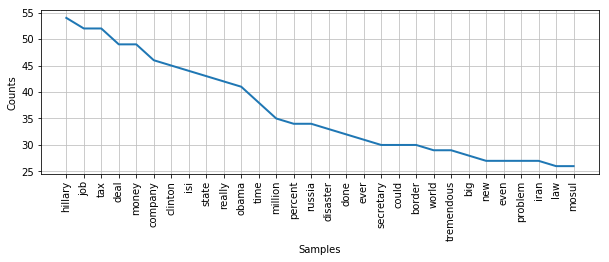

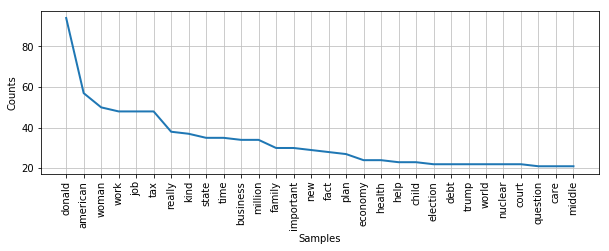

In [8]:
plt.figure(figsize=(10,3))
fdist_trump.plot(30)

plt.figure(figsize=(10,3))
fdist_clinton.plot(30)

### These work, but we can build much better looking and easier to understand charts with seaborn. 
> First,  we need to reformat the data to meet our needs. Seaborn makes it easy to use data frames, so we are going to combine the freqency lists into one dataframe. 


##### Convert frequency distributions into dataframes

In [9]:
freq_word_clinton = []
# two values or columns in fdist_a
for k,v in fdist_clinton.items():
    freq_word_clinton.append([k,v, 'Clinton'])
#make it like an Excel worksheet
wordlist_clinton = pd.DataFrame(freq_word_clinton)

In [10]:
freq_word_trump = []
# two values or columns in fdist_a
for k,v in fdist_trump.items():
    freq_word_trump.append([k,v, 'Trump'])
#make it like an Excel worksheet
wordlist_trump = pd.DataFrame(freq_word_trump)

##### Combine the two frequency distributions into one dataframe

In [11]:
df3 = wordlist_clinton.append(wordlist_trump)
df3 = df3.rename(columns={0: 'word', 1: 'freq', 2: 'speaker'})
df4 = df3.sort_values(by=['freq'], ascending=False).head(40)

In [12]:
df4 = df3.sort_values(by=['freq'], ascending=False).head(30)

# Seaborn Visualization

Using seaborn we can show both canidates word frequency on a single chart. We will use factorplot to do this.<br> https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot
>* Set our X values to frequency
* Set our Y values to word

>* We want a bar chart (kind = bar)
* We want a horizontal orientation (orient = h)

>* We can also set colors to represent categories
 * Trump: Red (Republican Party Color)
 * Clinton: Blue (Democratic Party Color)
 * palette=dict(Trump = "#D65F5F", Clinton = "#4878CF")

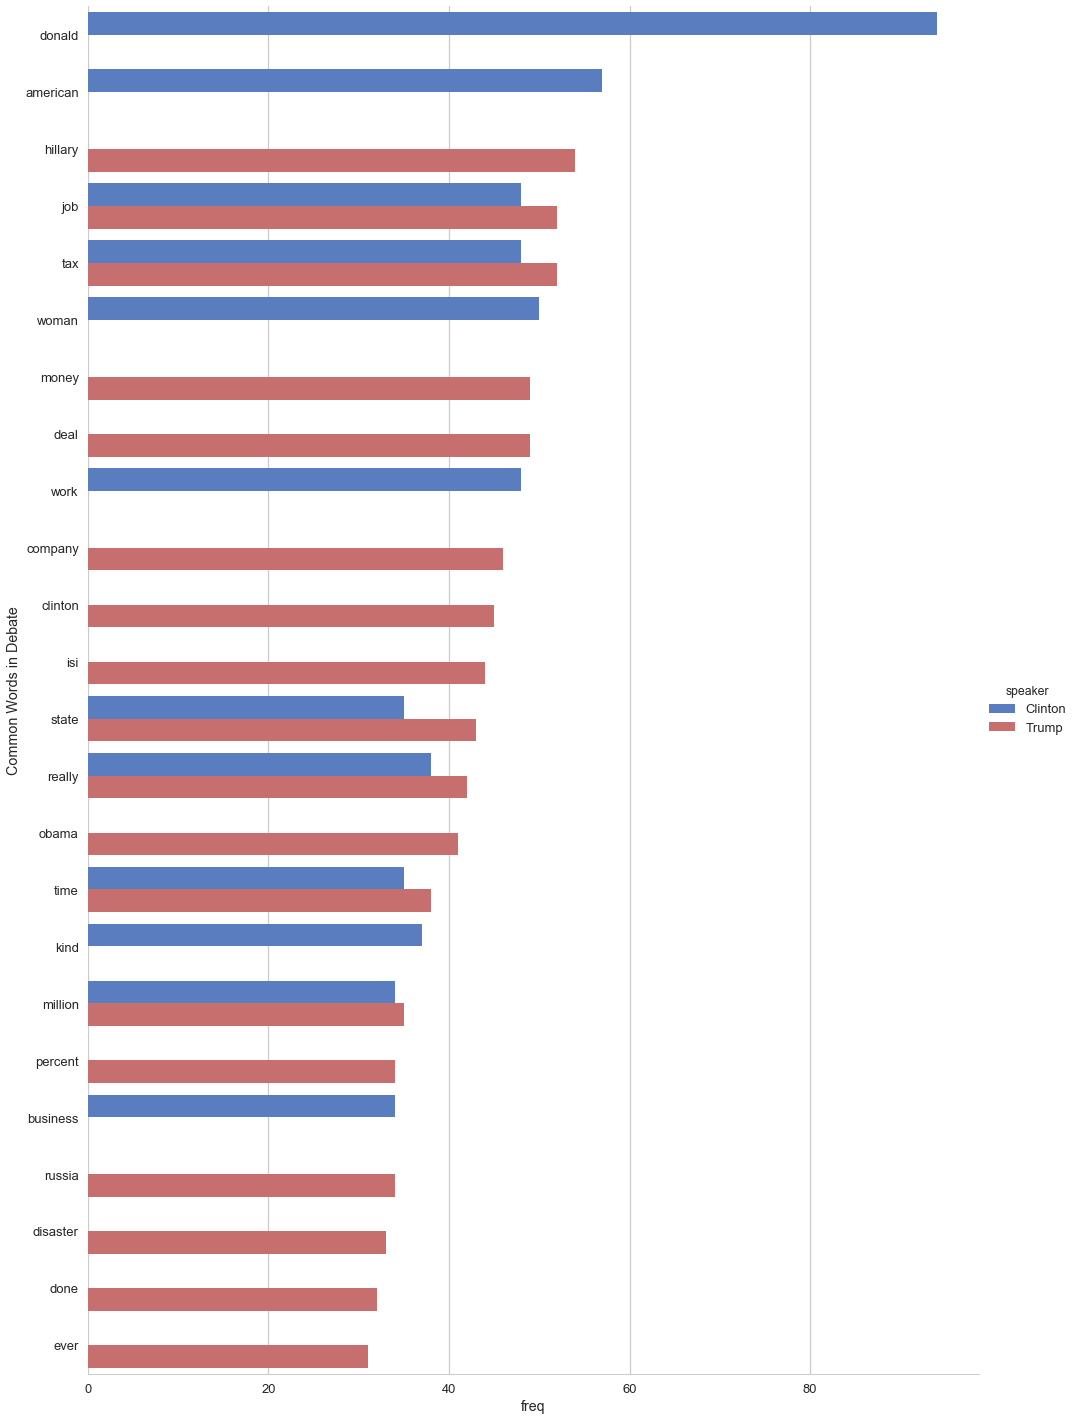

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("talk")
sns.color_palette(palette=None, n_colors=None, desat=None)

g = sns.factorplot(x="freq", y="word", hue="speaker", data=df4,
                   size=20, kind="bar", aspect=.7,
                   palette=dict(Trump = "#D65F5F", Clinton = "#4878CF"), orient="h")
g.despine(left=True)
g.set_ylabels("Common Words in Debate")

#### We can adapt this into a factor plot easily. 

In [14]:
df4 = df3.sort_values(by=['freq'], ascending=False).head(30)

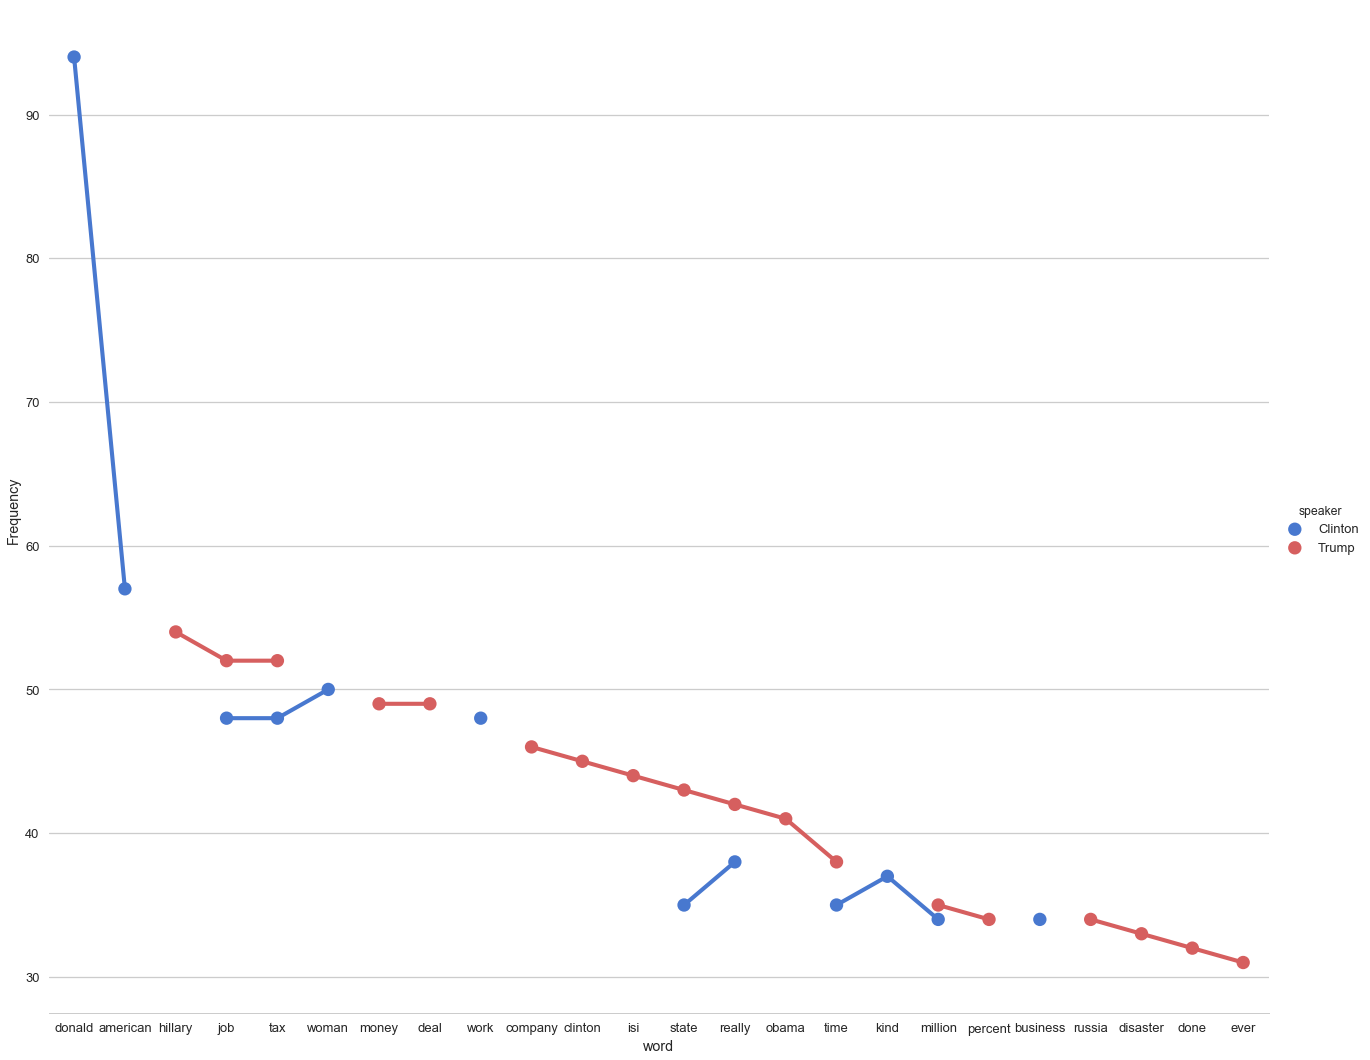

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("talk")
sns.color_palette(palette=None, n_colors=None, desat=None)

g = sns.factorplot(x="word", y="freq", hue="speaker", data=df4,
                   size=15, aspect=1.2,
                   palette=dict(Trump = "#D65F5F", Clinton = "#4878CF"))
g.despine(left=True)
g.set_ylabels("Frequency")

## Bokeh Visualization

Adapt bokeh chart to our data set for final draft<br>
https://bokeh.pydata.org/en/latest/
<br>from bokeh.io import curdoc <br>
curdoc().clear()

In [16]:
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
output_notebook()

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, plot_height=250, y_range=(0, 9), title="Fruit Counts")
p.vbar(x='fruits', top='counts', width=0.9, color='color', legend="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

Loading BokehJS ...

# Scattertext for Descriptive Text Analytics and Visualization
> Now that we have reviewed basic visualization of word frequency, let's look at some more advanced tools. Scattertext is a comprehensive package that provides tools for visualizing terms and associations, topics and categories, term scores, text classification weights, semiotic squares, word similarity, and even emojis! 

> We are going to start with visualizing terms and associations, then we will explore some of the more advanced topics. 

> https://github.com/JasonKessler/Scattertext-PyData
 

#### First ensure that you installed and imported all of the packages listed in the first section

In [17]:
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm

#### Reload and Process the debate dataset
* Scattertext and spaCY make the preprocessing very easy
* All we need to do is create a dataframe with two columns (category and text data)
 1. Speaker (Trump and Clinton) these are our categories
 2. Text (the text data for analysis)

In [18]:
df = pd.read_csv("data/debate.csv", encoding = 'iso-8859-1')
del df['Line']
del df['Date']
df_clinton = df[df.Speaker=="Clinton"].copy()
df_trump = df[df.Speaker=="Trump"].copy()
df3 = df_clinton.append(df_trump)

### Turn the data frame into a Scattertext Corpus
* We want to look for differences between Trump and Clinton so we set (category_col='Speaker')
* We want to analyize the text for each canidate so we set (text_col = 'Text')
* We are not going to remove stopwords for this visualization because they might actually help provide insight in this use case (if you want to use stop word the code is included below)
>Jason Kessler the creator of Scattertext said "function words can reveal interesting psychological traits"

* ##### To remove stopwords: 
 * from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
 * put this after .build()
   * .remove_terms(ENGLISH_STOP_WORDS, ignore_absences=True)

* ##### spaCY error troubleshooting
 * If you get an error for spaCY, it may not be able to load the local english langauge. Replace 'nlp = spacy.load('en')' with:
  * nlp = en_core_web_sm.load()

In [19]:
nlp = spacy.load('en') 
corpus = st.CorpusFromPandas(df3, category_col='Speaker', text_col='Text', nlp=nlp).build()

##### Let's see characteristic terms in the corpus, and terms that are most associated with both Trump and Hillary

In [20]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['obamacare', 'wikileaks', 'raqqa', 'obama', 'outsmarted', 'mosul', 'baghdadi', 'irredeemable', 'tweeting', 'underleveraged']


##### Let's see characteristic terms in the corpus, and terms that are most associated with Trump

In [21]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Trump Score'] = corpus.get_scaled_f_scores('Trump')
pprint(list(term_freq_df.sort_values(by='Trump Score', ascending=False).index[:10]))

['hillary',
 "she 's",
 'she',
 'bad',
 'tell you',
 'tell',
 "they 're",
 'clinton',
 'her',
 'and she']


##### Let's see characteristic terms in the corpus, and terms that are most associated with Clinton

In [22]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Clinton Score'] = corpus.get_scaled_f_scores('Clinton')
pprint(list(term_freq_df.sort_values(by='Clinton Score', ascending=False).index[:10]))

['donald',
 'need to',
 'his',
 'that he',
 "'ve got",
 'he',
 'i want',
 'that is',
 'work',
 'he has']


## Visualization of terms with Scattertext
* Using the corpus we created the produce_scattertext_explorer function will create an interactive visualization of terms
* Hillary Clinton will be plotted on the Y axis
* Donald Trump will be plotted on the X axis
* You can click on a term and see the sentences that Hillary Clinton or Donald Trump used them in. 
* We will also use Iframe so we can embed the HTML output in the notebook

In [23]:
# category = 'Clinton' (this creates a category for Hillary Clinton)
# not_category_name = 'Donald Trump' every thing that is not in the clinton category is in the Trump category
html = st.produce_scattertext_explorer(corpus, category='Clinton', category_name='Hillary Clinton', 
                                       not_category_name='Donald Trump', width_in_pixels=1000, metadata=df3['Speaker'])
open("TrumpClinton_Visualization.html", 'wb').write(html.encode('utf-8'))

736831

In [24]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
file_name = 'TrumpClinton_Visualization.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1300, height=800)

# Topic Modeling Visualization Using Scattertext
>Instead of looking for common terms we will be looking for topics that Hillary Clinton and Donald Trump had in thier debates

In [25]:
df3.head(1)

,Speaker,Text
2,Clinton,"How are you, Donald?"


##### Create a corpus of topics/categories rather than terms. We will do this using **FeatsOnlyFromEmpath**

In [26]:
empath_corpus = st.CorpusFromParsedDocuments(df3, category_col='Speaker', 
                                             feats_from_spacy_doc=st.FeatsFromOnlyEmpath(), 
                                             parsed_col='Text').build()

In [27]:
html = st.produce_scattertext_explorer(empath_corpus, category= 'Clinton', category_name='Hillary Clinton', 
                                       not_category_name='Donald Trump', width_in_pixels=1000, 
                                       metadata=df3['Speaker'], use_non_text_features=True, use_full_doc=True)
open("TrumpClintonDebate-Empath.html", 'wb').write(html.encode('utf-8'))

661421

In [28]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
file_name = 'TrumpClintonDebate-Empath.html'
file = open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1500, height=700)

# Visualizing scikit-learn text classification weights

* pip install lightning-python
* conda install -c conda-forge sklearn-contrib-lightning

### First we need to build a text classification model. We will use techniques learned in class. Note we are going to use all of the speakers in this model not just Trump and Hillary. 

In [29]:
#read and format data
df5 = pd.read_csv("data/debate.csv", encoding = 'iso-8859-1')
del df5['Line']
del df5['Date']
df7 = df5[df5.Speaker=="Clinton"].copy()
df8 = df5[df5.Speaker=="Trump"].copy()
df5= df7.append(df8)

Labels are set so Trump = 1 and Clinton = 0

In [30]:
df5['Speaker'] = df5['Speaker'].str.replace('Trump', '0')
df5['Speaker'] = df5['Speaker'].str.replace('Clinton', '1')

In [31]:
#target_names is a list of the two categories which is a class-label list.
target_names = ['Trump', 'Clinton']

In [32]:
df5 = df5.rename(columns={'Speaker': 'Label', 'Text': 'Data'})

In [33]:
#create seperate dataframes for data and labels. 
sms = df5.copy()
sms_data = df5['Data'].copy()
sms_labels = df5['Label'].copy()

#use .values.tolist() to transform dataframe into list
sms = sms.values.tolist()
sms_data = sms_data.values.tolist()
sms_labels = sms_labels.values.tolist()

In [34]:
#Create training and testing sets
x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(478, 478, 120, 120)

In [35]:
#y_train must be an array for this
import numpy as np
y_train1 = np.asarray(y_train)

In [36]:
#create vectors
vectorizer = TfidfVectorizer(decode_error ='ignore', stop_words='english')
tfidf_X = vectorizer.fit_transform(x_train)
count_vectorizer = CountVectorizer(vocabulary=vectorizer.vocabulary_, decode_error ='ignore')

In [37]:
corpus = st.CorpusFromScikit(X=count_vectorizer.fit_transform(x_train), 
                             y=y_train1, 
                             feature_vocabulary=vectorizer.vocabulary_,
                             category_names=target_names,
                             raw_texts=x_train).build()

In [38]:
clf = CDClassifier(penalty="l1/l2",
                   loss="squared_hinge",
                   multiclass=True,
                   max_iter=20,
                   alpha=1e-4,
                   C=1.0 / tfidf_X.shape[0],
                   tol=1e-3)
clf.fit(tfidf_X, y_train1)
term_scores = clf.coef_[0]

In [45]:
html = st.produce_frequency_explorer(corpus, 'Clinton', scores=term_scores,
                                     use_term_significance=True,
                                     terms_to_include=st.AutoTermSelector.get_selected_terms(corpus, term_scores, 4000),
                                     metadata = y_train1)
open("class.html", 'wb').write(html.encode('utf-8'))

C:\Users\nmins\Anaconda2\envs\py36\lib\site-packages\scattertext\TermDocMatrix.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  freq_mat[:, cat_i] = self._X[self._y == cat_i, :].sum(axis=0)


1012818

In [46]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
file_name = 'class.html'
file = open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1500, height=700)

## Scatter Text Concepts With truthful and deceptive hotel reviews
* You can find the data here: https://www.kaggle.com/rtatman/deceptive-opinion-spam-corpus/data
* This corpus consists of truthful and deceptive hotel reviews of 20 Chicago hotels. The data is described in two papers according to the sentiment of the review. In particular, we discuss positive sentiment reviews in [1] and negative sentiment reviews in [2]. 

In [47]:
df = pd.read_csv("data/deceptive-opinion.csv", encoding = 'iso-8859-1')

In [48]:
del df['hotel']
del df['source']

In [49]:
df.groupby(['deceptive','polarity']).count()

text
deceptive polarity      
deceptive negative   400
          positive   400
truthful  negative   400
          positive   400

#### Visualizing topics of truthful reviews and deceptive reviews

In [50]:
nlp = en_core_web_sm.load()
empath_corpus = st.CorpusFromParsedDocuments(df, category_col='deceptive', feats_from_spacy_doc=st.FeatsFromOnlyEmpath(), parsed_col='text').build()

In [51]:
html = st.produce_scattertext_explorer(empath_corpus, category= 'deceptive', category_name='Deceptive Reviews', 
                                       not_category_name='Truthful Reviews', width_in_pixels=1000, 
                                       metadata=df['polarity'], use_non_text_features=True, use_full_doc=True)
open("deceptive_truthful.html", 'wb').write(html.encode('utf-8'))

2510993

In [52]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
file_name = 'deceptive_truthful.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1300, height=800)

#### Visualizing term associations of postive reviews and negative reviews

In [53]:
nlp = en_core_web_sm.load()
empath_corpus = st.CorpusFromParsedDocuments(df, category_col='polarity', feats_from_spacy_doc=st.FeatsFromOnlyEmpath(), parsed_col='text').build()

In [54]:
html = st.produce_scattertext_explorer(empath_corpus, category= 'positive', category_name='Positive Reviews', 
                                       not_category_name='Negative Reviews', width_in_pixels=1000, 
                                       metadata=df['deceptive'], use_non_text_features=True, use_full_doc=True)
open("pos_neg.html", 'wb').write(html.encode('utf-8'))

2511766

In [55]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
file_name = 'pos_neg.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1300, height=800)

In [56]:
df.groupby(['deceptive','polarity']).count()

text
deceptive polarity      
deceptive negative   400
          positive   400
truthful  negative   400
          positive   400

## Lexicalized Semiotic Squares

* This technique will visualize the data in four quadrants
* The Y Axis will show deceptive vs truthful
* The X axis will show positive vs negative
---

##### First we need to create a category column that combines the deceptive and polarity columns. 
> This will give us four categories
* truthful positive
* truthful negative
* deceptive positive
* deceptive negative

In [57]:
df['category'] = df['deceptive'] + ' ' + df['polarity']

In [58]:
df.head()

,deceptive,polarity,text,category
0,truthful,positive,We stayed for a one night getaway with family ...,truthful positive
1,truthful,positive,Triple A rate with upgrade to view room was le...,truthful positive
2,truthful,positive,This comes a little late as I'm finally catchi...,truthful positive
3,truthful,positive,The Omni Chicago really delivers on all fronts...,truthful positive
4,truthful,positive,I asked for a high floor away from the elevato...,truthful positive


##### Tokenize the text column using NLP

In [59]:
df['parse'] = df['text'].apply(nlp)

In [60]:
df.head(1)

,deceptive,polarity,text,category,parse
0,truthful,positive,We stayed for a one night getaway with family ...,truthful positive,"(We, stayed, for, a, one, night, getaway, with..."


In [61]:
def get_metadata_from_corpus(corpus):
    df = corpus.get_df()
    return (df.deceptive + ', ' 
            + df.polarity + ', ')

In [62]:
# Create corpus and filter terms
# to remove stopwords: 
    # from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    # put this after .build()
        # .remove_terms(ENGLISH_STOP_WORDS, ignore_absences=True)
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

four_square_corpus = (st.CorpusFromParsedDocuments(df, category_col = 'category', parsed_col = 'parse')
                      .build()
                      .compact(st.CompactTerms(minimum_term_count=2, slack=5))
                      .compact(st.ClassPercentageCompactor(term_count=2)))

In [63]:
# Set up chart structure
four_square = st.FourSquare(
    four_square_corpus,
    category_a_list=['truthful positive'],
    category_b_list=['deceptive positive'],
    not_category_a_list=['deceptive negative'],
    not_category_b_list=['truthful negative'],
    scorer=st.RankDifference(),
    labels={'a': 'Truthful and Positive',
            'b': 'Deceptive and Positive',
            'not_a_and_not_b': 'Negative',
            'a_and_b': 'Positive',
            'a_and_not_b': 'Truthful',
            'b_and_not_a': 'Deceptive',
            'not_a': 'Deceptive and Negative',
            'not_b': 'Truthful and Negative'})

In [64]:
html = st.produce_four_square_explorer(four_square=four_square,
                                       x_label='Truthful - Deceptive',
                                       y_label='Positive - Negative',
                                       use_full_doc=True,
                                       pmi_threshold_coefficient=0,
                                       metadata=get_metadata_from_corpus(four_square_corpus))

In [66]:
file_name = 'semiotic_axes.html'
open(file_name, 'wb').write('<center><h2>The Semiotics of Deceptive Hotel Reviews: Deceptive vs. Truthful, Positive vs. Negative</h2></center>'.encode('utf-8') + html.encode('utf-8'))
IFrame(src=file_name, width = 1600, height=900)

##  Visualizing scikit-learn text classification weights

In [67]:
df.head()

,deceptive,polarity,text,category,parse
0,truthful,positive,We stayed for a one night getaway with family ...,truthful positive,"(We, stayed, for, a, one, night, getaway, with..."
1,truthful,positive,Triple A rate with upgrade to view room was le...,truthful positive,"(Triple, A, rate, with, upgrade, to, view, roo..."
2,truthful,positive,This comes a little late as I'm finally catchi...,truthful positive,"(This, comes, a, little, late, as, I, 'm, fina..."
3,truthful,positive,The Omni Chicago really delivers on all fronts...,truthful positive,"(The, Omni, Chicago, really, delivers, on, all..."
4,truthful,positive,I asked for a high floor away from the elevato...,truthful positive,"(I, asked, for, a, high, floor, away, from, th..."


In [69]:
df['category'] = df['category'].str.replace('truthful positive', '0')
df['category'] = df['category'].str.replace('truthful negative', '1')
df['category'] = df['category'].str.replace('deceptive positive', '2')
df['category'] = df['category'].str.replace('deceptive negative', '3')

In [70]:
target_names = ['truthful positive', 'truthful negative', 'deceptive positive', 'deceptive negative']

In [71]:
df = df.rename(columns={'category': 'Label', 'text': 'Data'})

In [72]:
#create seperate dataframes for data and labels. 
sms = df.copy()
sms_data = df['Data'].copy()
sms_labels = df['Label'].copy()

#use .values.tolist() to transform dataframe into list
sms = sms.values.tolist()
sms_data = sms_data.values.tolist()
sms_labels = sms_labels.values.tolist()

In [73]:
#Create training and testing sets
x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(1280, 1280, 320, 320)

In [74]:
#y_train must be an array for this
import numpy as np
y_train1 = np.asarray(y_train)

In [75]:
#create vectors
vectorizer = TfidfVectorizer(decode_error ='ignore', stop_words='english')
tfidf_X = vectorizer.fit_transform(x_train)
count_vectorizer = CountVectorizer(vocabulary=vectorizer.vocabulary_, decode_error ='ignore')

In [76]:
corpus = st.CorpusFromScikit(X=count_vectorizer.fit_transform(x_train), 
                             y=y_train1, 
                             feature_vocabulary=vectorizer.vocabulary_,
                             category_names=target_names,
                             raw_texts=x_train).build()

In [77]:
clf = CDClassifier(penalty="l1/l2",
                   loss="squared_hinge",
                   multiclass=True,
                   max_iter=20,
                   alpha=1e-4,
                   C=1.0 / tfidf_X.shape[0],
                   tol=1e-3)
clf.fit(tfidf_X, y_train1)
term_scores = clf.coef_[0]

In [81]:
html = st.produce_frequency_explorer(corpus, 'truthful positive', scores=term_scores,
                                     use_term_significance=False,
                                     terms_to_include=st.AutoTermSelector.get_selected_terms(corpus, term_scores, 4000),
                                     metadata = y_train1)
open("class.html", 'wb').write(html.encode('utf-8'))

C:\Users\nmins\Anaconda2\envs\py36\lib\site-packages\scattertext\TermDocMatrix.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  freq_mat[:, cat_i] = self._X[self._y == cat_i, :].sum(axis=0)


1928105

In [82]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
file_name = 'class.html'
file = open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1500, height=700)

### Use nbconvert to keep the outputs that are HTML
https://github.com/jupyter/nbconvert

In [77]:
! jupyter nbconvert to html Minshew_Tutorial.ipynb

[NbConvertApp] WARNING | pattern u'to' matched no files
[NbConvertApp] WARNING | pattern u'html' matched no files
[NbConvertApp] Converting notebook Minshew_Tutorial.ipynb to html
[NbConvertApp] Writing 467453 bytes to Minshew_Tutorial.html
